In [1]:
import pandas
def process_csv(input_file, output_file_total, output_file_small, relatedness_correction=1):
    # Read the CSV file
    df = pandas.read_csv(input_file)

    # Add a new column for total allele count
    df['totalAlleleCount'] = df['referenceAlleleCount'] + df['alternateAlleleCount']

    # Add new columns for reference and alternate allele frequencies
    df['referenceAlleleFrequency'] = df['referenceAlleleCount'] / df['totalAlleleCount']
    df['alternateAlleleFrequency'] = df['alternateAlleleCount'] / df['totalAlleleCount']

    # Add a new column for the minimum of the two frequencies
    df['minAlleleFrequency'] = df[['referenceAlleleFrequency', 'alternateAlleleFrequency']].min(axis=1)

    # Add classification based on minAlleleFrequency
    df['alleleClassification'] = df['minAlleleFrequency'].apply(
        lambda x: 'heterozygous' if x > 0.25 else 'homozygous'
    )
    
    # Following https://www.jmdjournal.org/article/S1525-1578(16)30138-6/fulltext
    # Values of min allele frequence between 0 and 1 indicate the presence of 2nd genome 
    # Calculate the mean min allele frequency for homozygous entries 
    # with good coverage, i.e. totalAlleleCount > 1000
    filtered_homozygous = "alleleClassification == 'homozygous' & totalAlleleCount > 1000"
    df_filtered_homozygous = df.query(filtered_homozygous)
    homozygous_mean_min_freq = df_filtered_homozygous['minAlleleFrequency'].mean()
    print(f"\nMean Min Allele Frequency for Homozygous Entries: {homozygous_mean_min_freq}")

    # Calculate the mean min allele frequency for homozygous entries 
    # with totalAlleleCount > 1000
    # and remove outliers by removing the top 5% highers values of min allele frequency
    threshold = df_filtered_homozygous['minAlleleFrequency'].quantile(0.95)
    print(f"\nThreshold = {threshold}")

    # Select rows where the value of minAlleleFrequency greater or equal than threshold
    # to check what is deselected
    top_5_percent = df_filtered_homozygous[df_filtered_homozygous['minAlleleFrequency'] >= threshold]
    #print(top_5_percent)
    
    filtered_homozygous_below_threshold = "alleleClassification=='homozygous' & totalAlleleCount > 1000 & minAlleleFrequency < @threshold"
    df_filtered_homozygous_below_threshold = df.query(filtered_homozygous_below_threshold)
    robust_homozygous_mean_min_freq = df_filtered_homozygous_below_threshold['minAlleleFrequency'].mean()
    print(f"\nRobust Mean Min Allele Frequency for Homozygous Entries = {robust_homozygous_mean_min_freq}")

    # relatedness
    # Chromosomes of related donors long stretches of DNA that are Identical By Descent (IBD),
    # which may lead to underestimation of dd-cfDNA.
    # Donor-derived cell-free DNA (dd-cfDNA) can be underestimated when the
    # donor is related to the recipient because the genetic similarities
    # between them make it harder to accurately distinguish the donor's DNA
    # from the recipient's DNA in a blood sample, leading to potential
    # misinterpretation of the test results as indicating a lower level of
    # donor-derived DNA than is actually present; this is primarily due to
    # the difficulty in identifying unique genetic markers (SNPs) that are
    # only present in the donor DNA and not in the recipient's DNA
    corrected_robust_homozygous_mean_min_freq = robust_homozygous_mean_min_freq * relatedness_correction
    print(f"\nRobust Mean Min Allele Frequency for Homozygous Entries corrected for relatedness = {corrected_robust_homozygous_mean_min_freq}")

    # Save the modified dataframe to a new CSV file
    df.to_csv(output_file_total, index=False)
    print(f"\nModified data saved to: {output_file_total}")

    # Save subset of dataframe to SNP data table
    snp_data_table = df[['SNPName', 'minAlleleFrequency', 'alleleClassification']]
    snp_data_table.to_csv(output_file_small, index=False)
    

# If related dd-cfNDA is underestimated
relatedness_correction = 2.0
process_csv("sample_read_pileup.csv", "total.csv", "small.csv", relatedness_correction)    


Mean Min Allele Frequency for Homozygous Entries: 0.0015785779590165251

Threshold = 0.003613498671056952

Robust Mean Min Allele Frequency for Homozygous Entries = 0.000501649641102715

Robust Mean Min Allele Frequency for Homozygous Entries corrected for relatedness = 0.00100329928220543

Modified data saved to: total.csv


In [93]:
d = pandas.read_csv("total.csv")

In [94]:
pandas.set_option('display.max_rows', None)
d

,SNPName,referenceAlleleCount,alternateAlleleCount,totalAlleleCount,referenceAlleleFrequency,alternateAlleleFrequency,minAlleleFrequency,alleleClassification
0,SNP1,1718,136,1854,0.926645,0.073355,0.073355,homozygous
1,SNP10,7047,0,7047,1.000000,0.000000,0.000000,homozygous
2,SNP100,2199,2499,4698,0.468072,0.531928,0.468072,heterozygous
3,SNP101,781,748,1529,0.510791,0.489209,0.489209,heterozygous
4,SNP102,0,6463,6463,0.000000,1.000000,0.000000,homozygous
5,SNP103,13,3335,3348,0.003883,0.996117,0.003883,homozygous
6,SNP104,3364,3237,6601,0.509620,0.490380,0.490380,heterozygous
7,SNP105,8587,19,8606,0.997792,0.002208,0.002208,homozygous
8,SNP106,5737,2,5739,0.999652,0.000348,0.000348,homozygous
9,SNP107,4125,5,4130,0.998789,0.001211,0.001211,homozygous


In [95]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, '')

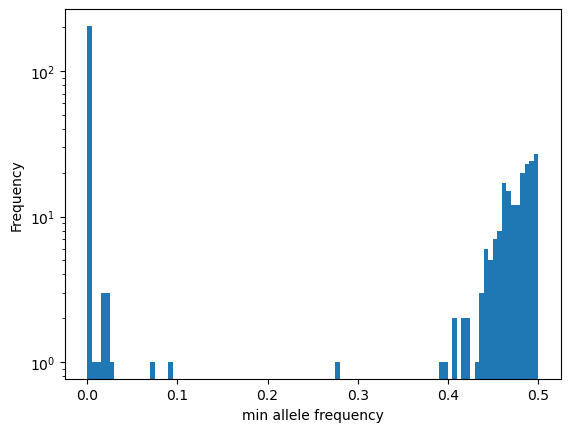

In [96]:
x = d["minAlleleFrequency"]
plt.hist(x, bins=100)
plt.yscale('log')
plt.xlabel('min allele frequency')
plt.ylabel('Frequency')
plt.title('')

Text(0.5, 1.0, '')

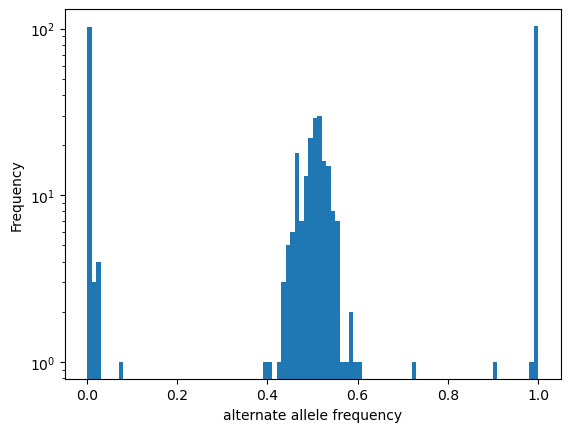

In [97]:
x = d["alternateAlleleFrequency"]
plt.hist(x, bins=100)
plt.yscale('log')
plt.xlabel('alternate allele frequency')
plt.ylabel('Frequency')
plt.title('')

Text(0.5, 1.0, 'homozygous')

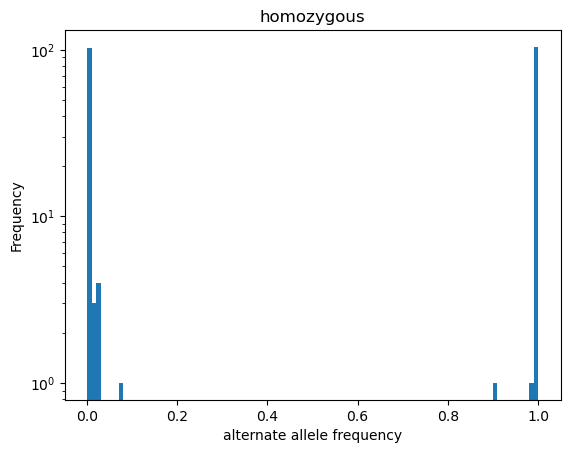

In [98]:
x = d.query("alleleClassification=='homozygous'")["alternateAlleleFrequency"]
plt.hist(x, bins=100)
plt.yscale('log')
plt.xlabel('alternate allele frequency')
plt.ylabel('Frequency')
plt.title('homozygous')

Text(0.5, 1.0, 'homozygous')

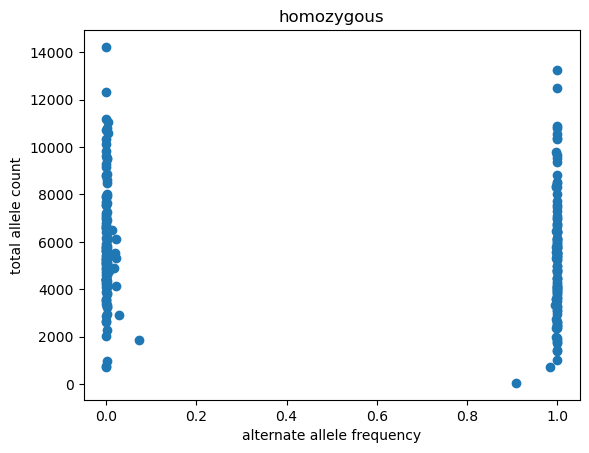

In [99]:
x = d.query("alleleClassification=='homozygous'")["alternateAlleleFrequency"]
y = d.query("alleleClassification=='homozygous'")["totalAlleleCount"]
plt.scatter(x, y)
plt.xlabel('alternate allele frequency')
plt.ylabel('total allele count')
plt.title('homozygous')

Text(0.5, 1.0, 'homozygous')

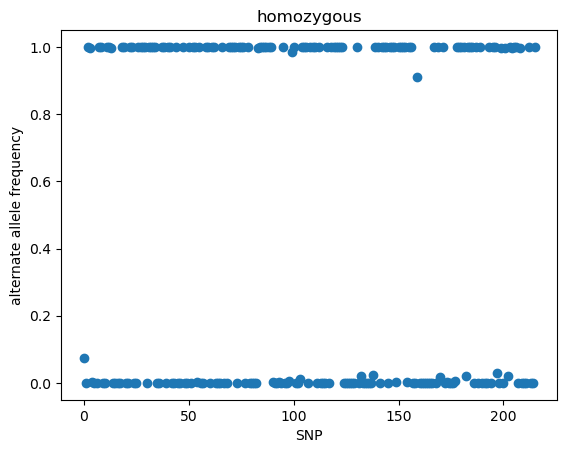

In [100]:
x = d.query("alleleClassification=='homozygous'")["alternateAlleleFrequency"]
y = d.query("alleleClassification=='homozygous'")["SNPName"]
yi = range(len(y))
plt.scatter(yi, x)
plt.ylabel('alternate allele frequency')
plt.xlabel('SNP')
plt.title('homozygous')

0.0020410653665316448


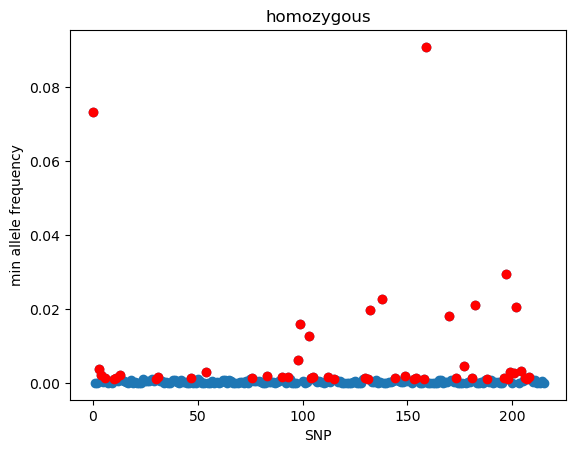

In [101]:
homozygous = d[d['alleleClassification'] == 'homozygous']
homozygous_mean_min_freq = homozygous['minAlleleFrequency'].mean()
print(homozygous_mean_min_freq)

x = d.query("alleleClassification=='homozygous'")["minAlleleFrequency"]
y = d.query("alleleClassification=='homozygous'")["SNPName"]
yi = range(len(y))

fig, axe = plt.subplots()

axe.scatter(yi, x)
axe.set_ylabel('min allele frequency')
axe.set_xlabel('SNP')
axe.set_title('homozygous')

dd = pandas.DataFrame({"minAlleleFrequency": x, "SNPName": yi})
dds = dd[dd['minAlleleFrequency'] > 0.001]
out = axe.scatter(dds['SNPName'], dds['minAlleleFrequency'], c="red")


0.0015785779590164921


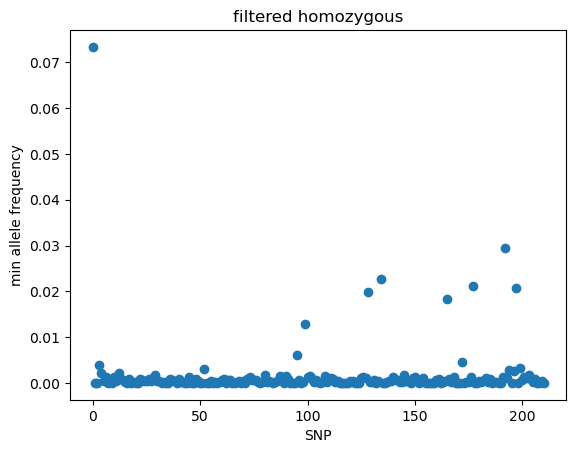

In [102]:
filtered_homozygous = d[(d['alleleClassification'] == 'homozygous') & (d['totalAlleleCount'] > 1000)]
homozygous_mean_min_freq = filtered_homozygous['minAlleleFrequency'].mean()
print(homozygous_mean_min_freq)

selection = "alleleClassification=='homozygous' & totalAlleleCount > 1000"
x = d.query(selection)["minAlleleFrequency"]
y = d.query(selection)["SNPName"]
yi = range(len(y))
plt.scatter(yi, x)
plt.ylabel('min allele frequency')
plt.xlabel('SNP')
out = plt.title('filtered homozygous')

threshold = 0.0036134986710569
homozygous_mean_min_freq = 0.0005016496411026822


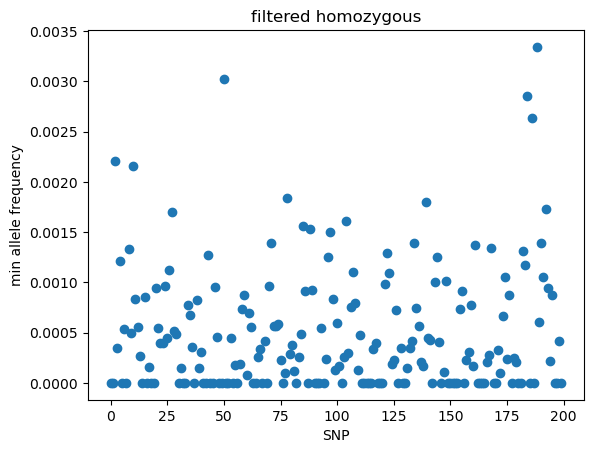

In [103]:
# Calculate the 95th percentile value
selection = "alleleClassification=='homozygous' & totalAlleleCount > 1000"
d_filtered_homozygous = d.query(selection)
threshold = d_filtered_homozygous['minAlleleFrequency'].quantile(0.95)
print(f"threshold = {threshold}")

# Select rows where the value of minAlleleFrequency greater or equal than threshold
top_5_percent = d_filtered_homozygous[d_filtered_homozygous['minAlleleFrequency'] >= threshold]

selection2 = "alleleClassification=='homozygous' & totalAlleleCount > 1000 & minAlleleFrequency < @threshold"

filtered_homozygous = d.query(selection2)
homozygous_mean_min_freq = filtered_homozygous['minAlleleFrequency'].mean()
print(f"homozygous_mean_min_freq = {homozygous_mean_min_freq}")

x = d.query(selection2)["minAlleleFrequency"]
y = d.query(selection2)["SNPName"]
yi = range(len(y))
plt.scatter(yi, x)
plt.ylabel('min allele frequency')
plt.xlabel('SNP')
out = plt.title('filtered homozygous')


In [104]:
top_5_percent

,SNPName,referenceAlleleCount,alternateAlleleCount,totalAlleleCount,referenceAlleleFrequency,alternateAlleleFrequency,minAlleleFrequency,alleleClassification
0,SNP1,1718,136,1854,0.926645,0.073355,0.073355,homozygous
5,SNP103,13,3335,3348,0.003883,0.996117,0.003883,homozygous
191,SNP328,4719,29,4748,0.993892,0.006108,0.006108,homozygous
207,SNP353,6412,83,6495,0.987221,0.012779,0.012779,homozygous
263,SNP422,5403,109,5512,0.980225,0.019775,0.019775,homozygous
271,SNP440,5199,121,5320,0.977256,0.022744,0.022744,homozygous
332,SNP520,4792,89,4881,0.981766,0.018234,0.018234,homozygous
340,SNP536,11005,51,11056,0.995387,0.004613,0.004613,homozygous
351,SNP552,4060,88,4148,0.978785,0.021215,0.021215,homozygous
377,SNP6,2840,86,2926,0.970608,0.029392,0.029392,homozygous
